In [1]:
import sys
sys.path.append('../../../src')
from helpers import *
%matplotlib notebook

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [14]:
path_ring = [data_path + '/Imaging/Free RING/211027_ring_glh_23/', 
             data_path + '/Imaging/Free RING/211027_ring_glh_30/']
paths_ring = direcslist(path_ring, 0)

path_ctrl = data_path + 'Imaging/Free mNG/210804_nwg378_tom4,5,60,500'
paths_ctrl = direcslist(path_ctrl, 0)

In [15]:
def func(path, save_path=None, scale_bar=False):
    fig, ax = plt.subplots()
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 270, 200, 3)
    ax.imshow(rotated, vmin=0, cmap='gray')
    ax.axis('off')
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=5)
    
    fig.savefig(save_path, dpi=600, transparent=True)

<IPython.core.display.Javascript object>


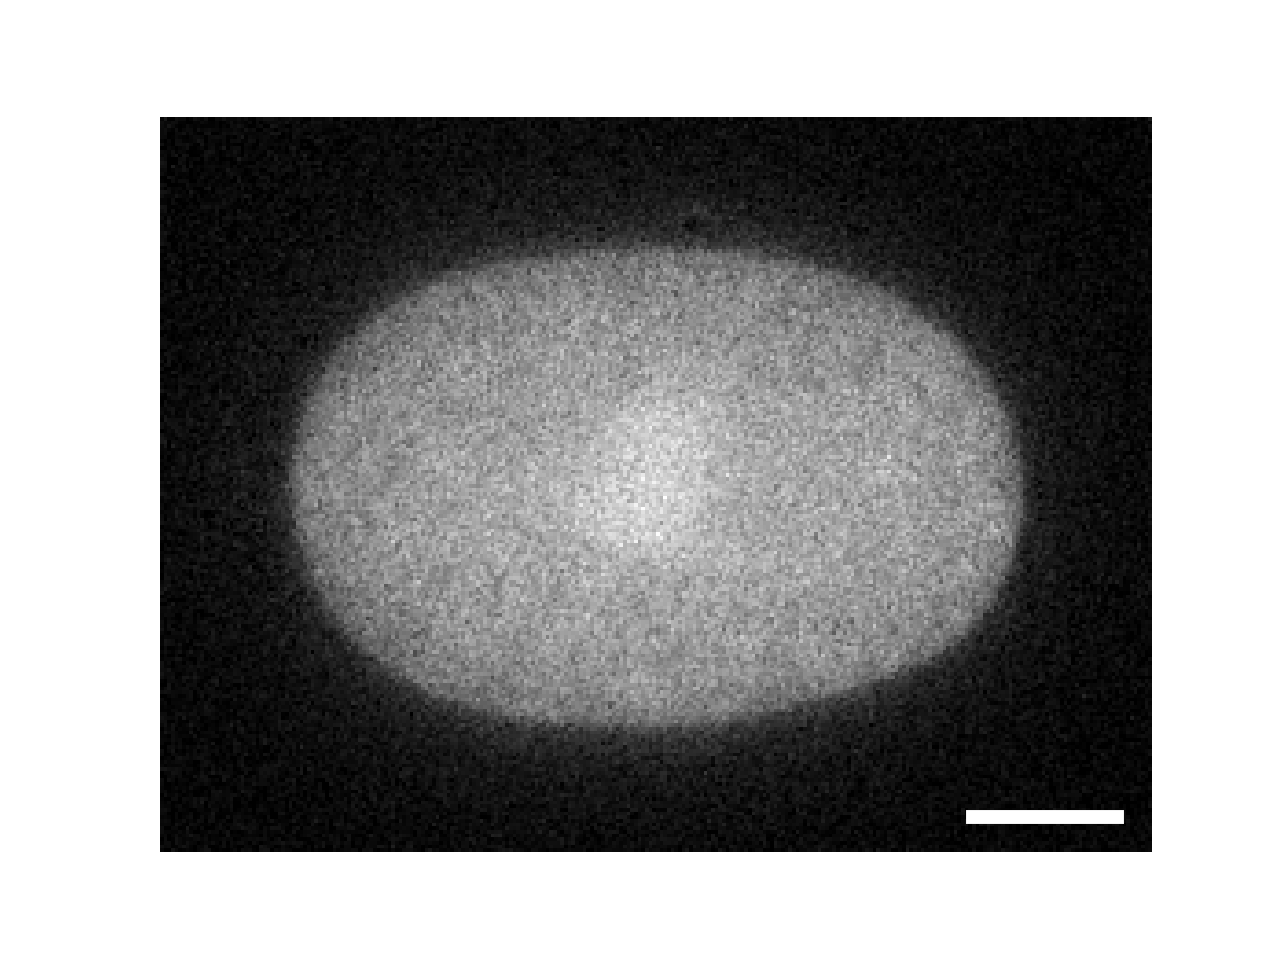

<IPython.core.display.Javascript object>


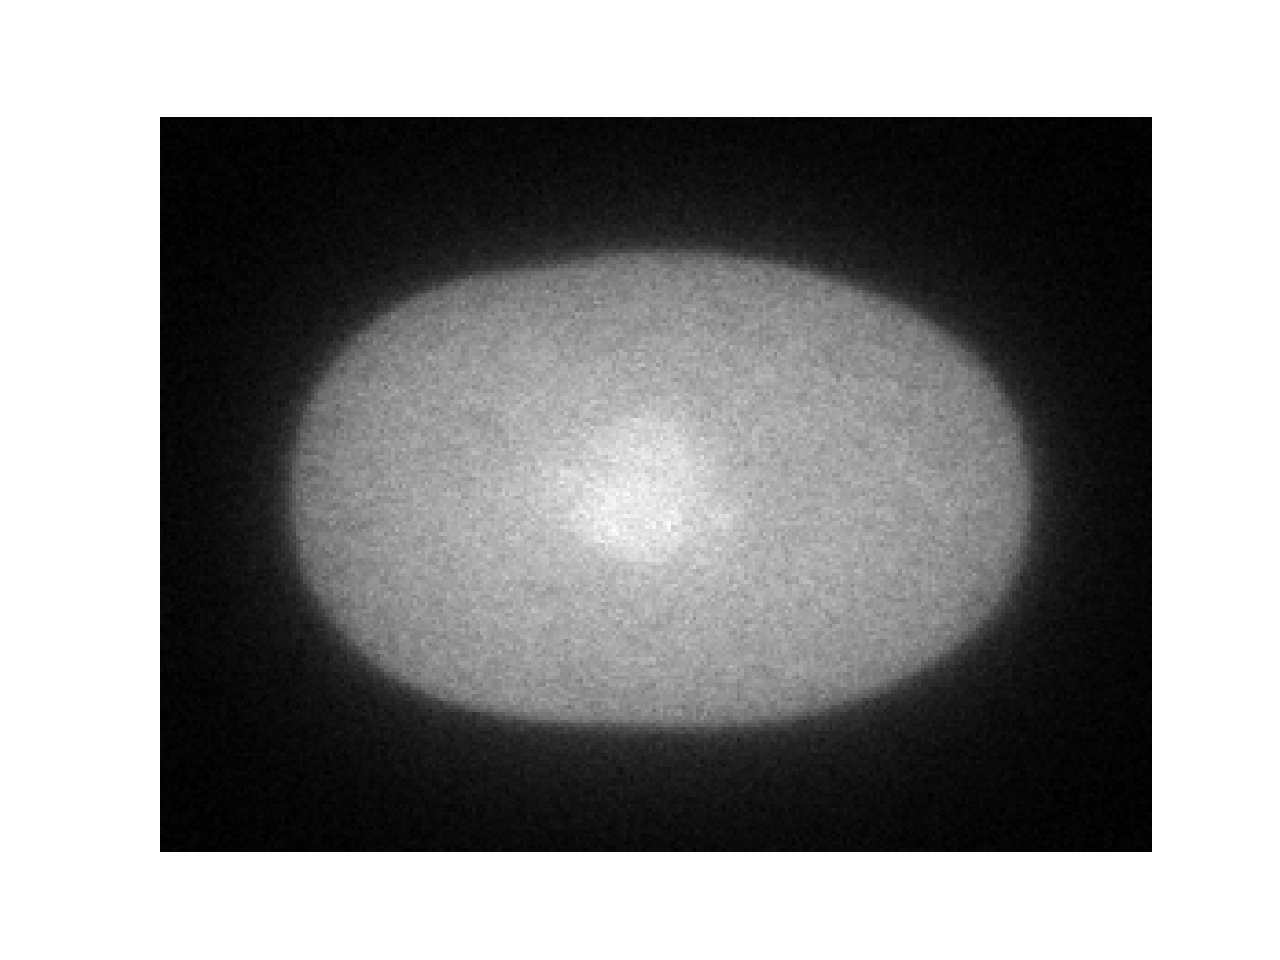

In [16]:
func(paths_ring[0], 'Figs/ring_fragment.png', scale_bar=True)
func(paths_ctrl[0], 'Figs/mNG_fragment.png')